In [1]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

from tqdm.notebook import tqdm


### Options for numerical integration

We can use Monte-Carlo integration.

$$ \int_{D} g(x)dx  = \int_D g(x) \frac{f(x)}{f(x)} dx = \int_D \frac{g(x)}{f(x)}f(x)dx = \mathbb{E}_f\left[ \frac{g(x)}{f(x)}\right] $$
By LLN sample mean converges in probability to math expectation of the same function of random variables:
$$
\frac{1}{N}\sum_{i=1}^{N} \frac{g(x_i)}{f(x_i)} \to \mathbb{E}_f\left[ \frac{g(x)}{f(x)}\right] 
$$
So algorithm for estimation any integral is the following:
    
1. Define the set on which we need to calculate integral (ex. $D = \mathbb{R}$ or
$ D = [a, b]$)
2. Define appropriate $ f(x)$ which is defined on the same set (ex. if $D =
 \mathbb{R}$ then we can take $f(x) = \phi(x)$, which is pdf of normal 
 distribution)
3. Draw $N$ samples from $f(x)$ and for each draw $i = 1...N$ calculate $g(x_i)/f(x_i) $
4. Average values across all draws. Obtained number would be value of integral

#### Example
Suppose we need to define the value for the next integral:
$$ \int_{0}^1 x^3dx = \left.\frac{x^4}{4}\right|^1_0  = \frac{1}{4}$$

1. Let $f(x)$ be pdf of $U[0, 1]$, i.e. $f(x) = 1$ then:
$$
\int_{0}^1 x^3dx = \mathbb{E}_f\left[ g(x) \right]
$$
Which by LLN can be estimated as follows:
$$
\frac{1}{N}\sum_{i=1}^{N} g(x_i) \to \mathbb{E}_f\left[ g(x) \right]
$$

lets find distribution of such estimates

In [9]:
from typing import Callable, List

0.24978279780451731
0.0024276291370452143


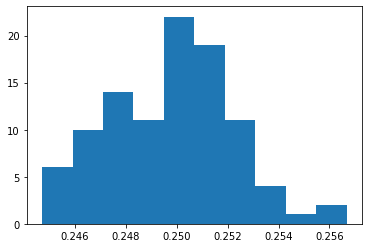

In [5]:
def slow_simulate(
        g: Callable,
        min: float,
        max: float,
        N: int,
        num_of_experiments: int) -> List[float]:

    areas = []

    for _ in tqdm(range(num_of_experiments)):
        X = np.random.uniform(min, max, size=N)
        areas.append(g(X).mean(axis=0) * (max - min))

    plt.hist(areas)
    print(areas.mean())
    print(areas.std())

    return areas


def simulate(g: Callable,
             min: float,
             max: float,
             N: int = 10_000,
             num_of_experiments: int = 100) -> np.array:

    X = np.random.uniform(min, max, size=(N, num_of_experiments))
    areas = g(X).mean(axis=0) * (max - min)

    plt.hist(areas)
    print(areas.mean())
    print(areas.std())
    return areas


def g(x: np.array) -> np.array:
    return x**3


areas = simulate(g, 0, 1)


#### Example 2
Lets integrate more complicated function
$$
\int_{0.025}^{0.975}\phi(x)dx
$$


0.9500280654247927
0.004437405139706012


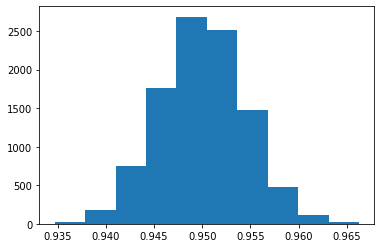

In [8]:
def g(x):
    return norm.pdf(x)


areas = simulate(g, -1.96, 1.96, num_of_experiments=10_000)